### Fonte dos datasets:
* #1 - https://www.kaggle.com/andrewmvd/fetal-health-classification 
* #2 - https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data 
     https://archive.ics.uci.edu/ml/datasets/banknote+authentication


(para mais informações a respeito do dataset, não hesite em consultar esse site)

# Importando módulos necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from dtreeviz.trees import dtreeviz
import graphviz
from sklearn.tree import export_graphviz
import sklearn
#import pybaobabdt
import shap
import itertools
from sklearn.model_selection import GridSearchCV

# #1 Fetal Health Dataset 

## Preprocessing

In [2]:
#importa o dataset
df = pd.read_csv('fetal_health.csv', encoding = 'utf-8') 

In [3]:
#visualiza as 5 primeiras linhas do df
df.head() 

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
#informações básicas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [230]:
#alguns dados estatísticos do df
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [231]:
#valores únicos da nossa target
df.fetal_health.unique()

array([2., 1., 3.])

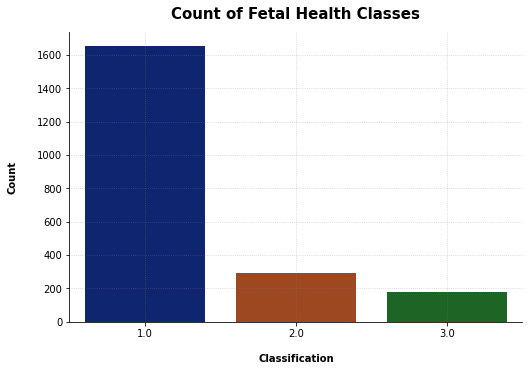

In [232]:
#plota um gráfico de distribuição da nossa target
sns.catplot(x = 'fetal_health', kind = 'count', data = df, height=5.27, aspect=11.7/8.27, palette = 'dark')
plt.xlabel("Classification", labelpad=15, fontweight = "bold", size = 10)
plt.ylabel("Count", labelpad=20, fontweight = "bold", size = 10)
plt.title("Count of Fetal Health Classes", y=1.025, fontweight = "bold", loc = 'center', size = 15)
plt.grid(linestyle = ':', color = 'gray', alpha = 0.4, zorder = 1)
plt.tight_layout()
plt.show()

Vemos que há uma predominância da classe 1 dentro do nosso dataset.

Após uma breve visualização das informações do nosso dataset, podemos afirmar que não há necessidade de fazer nenhuma transformação nos dados. Podemos partir para o treinamento de um modelo para predizer os dados.

## Train and test

In [9]:
# pega todas as colunas exceto fetal_health
X = df.drop(columns = 'fetal_health')
# fetal_health
y = df[['fetal_health']]

In [10]:
# divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [11]:
# classificador
clf = DecisionTreeClassifier(max_depth= 3)

In [12]:
# fita e prediz o modelo 
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

### Tuning the model

In [15]:
# hiperparâmetros a serem tunados 231 200
param_grid = {'max_depth': np.arange(4, 21), 'criterion': ["gini", "entropy"], 'min_samples_split': np.arange(4, 21),
 'min_samples_leaf': np.arange(1, 11), 'splitter': ['best', 'random']}

In [16]:
# performa o grid search cross validation 
clf_cv = GridSearchCV(estimator=clf, param_grid= param_grid, cv= 5, scoring = 'accuracy', verbose = 1)
clf_cv.fit(X_train, y_train)

# mostra o melhor classificador encontrado
clf_cv.best_estimator_

Fitting 5 folds for each of 11560 candidates, totalling 57800 fits


DecisionTreeClassifier(max_depth=12, min_samples_split=13)

In [17]:
tuned_clf = clf_cv.best_estimator_

# prediz o modelo tunado
y_train_predict_tuned_clf = tuned_clf.predict(X_train)
y_test_predict_tuned_clf = tuned_clf.predict(X_test)

## Evaluation

In [13]:
def evaluate_model(y_train, y_test, y_train_predict, y_test_predict):
    #métricas
    print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict):.2}')
    print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict):.2}')

    print('Confusion matrix: ')
    print(confusion_matrix(y_test, y_test_predict))
    # plotando a matriz de confusão acima
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_predict)).plot()
    plt.title('Confusion matrix')
    plt.show()
    print('Classification report: ')
    print(classification_report(y_test, y_test_predict))

Acurácia no treino: 0.92
Acurácia no teste: 0.88
Confusion matrix: 
[[474  17   6]
 [ 33  49   6]
 [  4  10  39]]


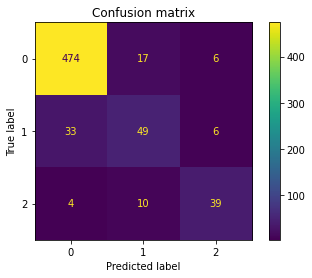

Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.64      0.56      0.60        88
         3.0       0.76      0.74      0.75        53

    accuracy                           0.88       638
   macro avg       0.78      0.75      0.76       638
weighted avg       0.88      0.88      0.88       638



In [14]:
evaluate_model(y_train, y_test, y_train_predict, y_test_predict)

Podemos afirmar que nosso modelo de árvore é bastante bom para a predição dos dados, visto que atua com uma acurácia de 88% em cima dos dados de teste. Além do mais, algumas meddas como a precisão, o recall e o f1-score são relativamente altas e também indicam uma boa performance do modelo. Vale notar que, como esperado, a predição é mais assertiva para a classe 1, visto que é a classe que mais aparece nos nossos dados.

### Modelo tunado

Acurácia no treino: 0.98
Acurácia no teste: 0.91
Confusion matrix: 
[[482  12   3]
 [ 29  54   5]
 [  6   1  46]]


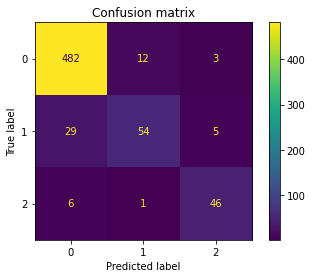

Classification report: 
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       497
         2.0       0.81      0.61      0.70        88
         3.0       0.85      0.87      0.86        53

    accuracy                           0.91       638
   macro avg       0.86      0.82      0.84       638
weighted avg       0.91      0.91      0.91       638



In [18]:
evaluate_model(y_train, y_test, y_train_predict_tuned_clf, y_test_predict_tuned_clf)

A ferramenta de Grid-Search usando Cross Validation nos ajudou a melhorar consideravelmente a performance do nosso modelo. A acurácia aumentou em 3%, o que, de fato, é um valor bem pequeno. No entanto, devemos considerar também outras métricas. Podemos ver que a predição do modelo tunado para as classes 2 e 3 aumentou de forma bastante expressiva (note a precisão, o recall e o f1-score). Com isso, podemos afirmar que o modelo tunado está mais apto a predizer sobre dados nunca vistos do que o anterior.

Para a visualização do modelo de árvore, vamos usar o modelo não-tunado, pois sua profundidade é menor.

## Model interpretability and explainability

### Feature Importance

In [19]:
#shap explainer
explainer = shap.TreeExplainer(clf)
#shap values
shap_values = explainer.shap_values(X)

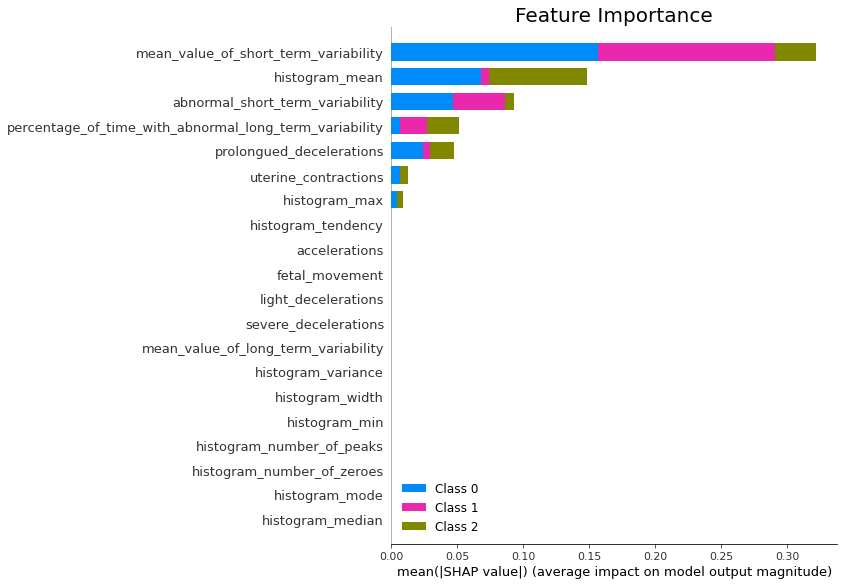

In [20]:
#plota a importância das features do nosso modelo, usando shap
shap.summary_plot(shap_values,X,show=False)
plt.title('Feature Importance',fontsize = 20) 
plt.show()

O gráfico acima nos mostra quais foram as features mais importantes, dentre todas, para a classificação de cada dado.

É importante destacar que várias das features não contribuíram de forma significativa ou quase significativa para a performance do modelo. Alguma técnica de feature selection poderia ter sido utilizada no nosso caso em vista disso. 

Podemos concluir, então, que, para predizer qual a saúde de um feto, é de extrema importância saber:
* Valor médio da variabilidade de curto prazo da frequência cardíaca fetal 
* Média do histograma
* Variabilidade de curto prazo da frequência cardíaca fetal anormal
* Tempo, em percentual, com variabilidade de curto prazo da frequência cardíaca fetal anormal
* Bradicardia fetal (desacelerações prolongadas)

Intuitivamente, podemos crer que, de fato, todos esses fatores devem se relacionar de maneira intrínseca com a saúde fetal;

### Model visualization

#### Classic tree visualization 

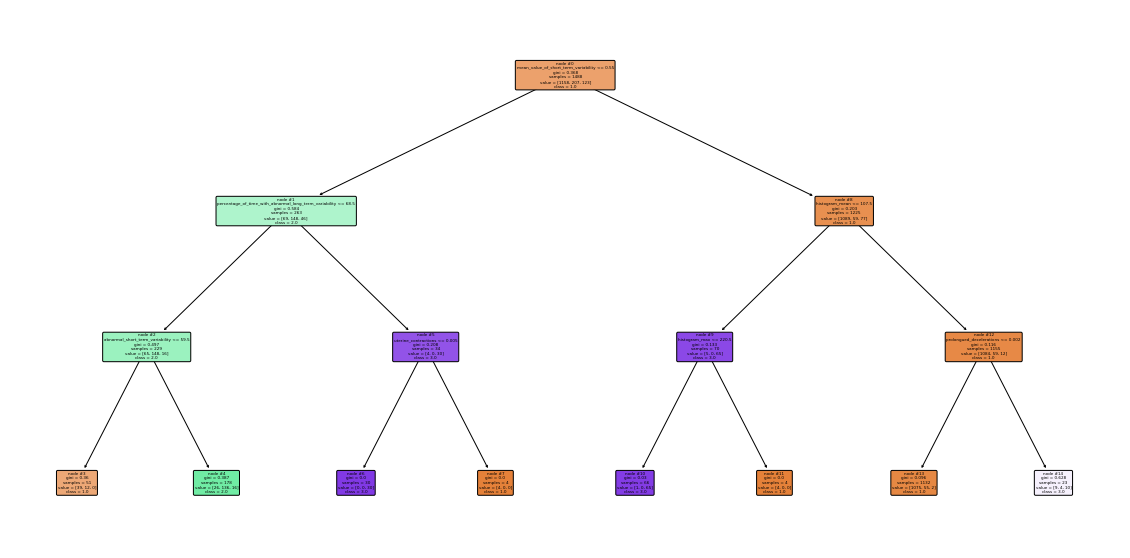

In [21]:
#rótulo de cada feature
feature_names = X.columns

#nome de cada classe da target
class_names = []
for Class in clf.classes_:
    string_class = str(Class)
    class_names.append(string_class)

#plota o gráfico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names= class_names, filled = True, node_ids = True, rounded = True)
plt.savefig('Classic tree visualization.png')
plt.show()

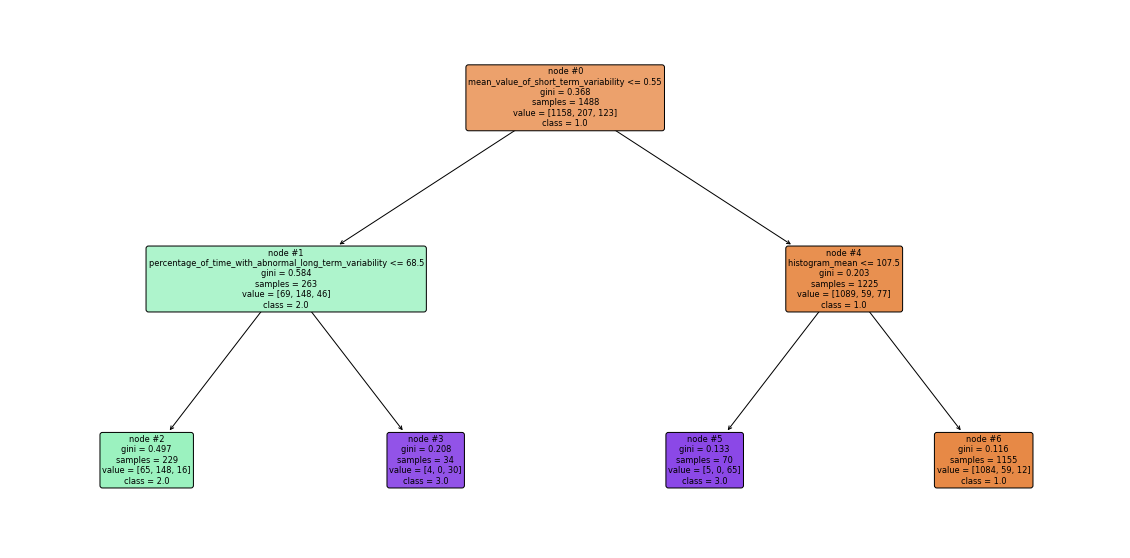

In [22]:
#novo modelo, com profundidade 3, para melhor visualização
clf = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

#rótulo de cada feature
feature_names = X.columns

#nome de cada classe da target
class_names = []
for Class in clf.classes_:
    string_class = str(Class)
    class_names.append(string_class)

#plota o gráfico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names= class_names,filled = True, node_ids = True, rounded = True)
plt.savefig('Classic tree visualization - depth 3.png')
plt.show()

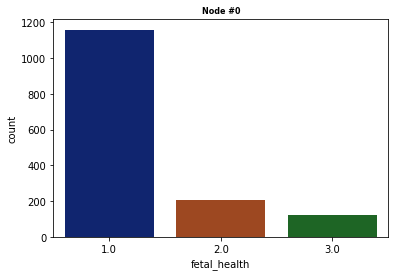

In [37]:
#une os dados de treino para facilitar a visualização
train = [X_train, y_train]
train_set = pd.concat(train, axis = 1, join = 'inner')

#plota a raiz (nó zero)
node_0 = sns.countplot(x = 'fetal_health', data = train_set, palette = 'dark')
node_0.set_title("Node #0", fontweight = "bold", fontsize = 8)
plt.show()

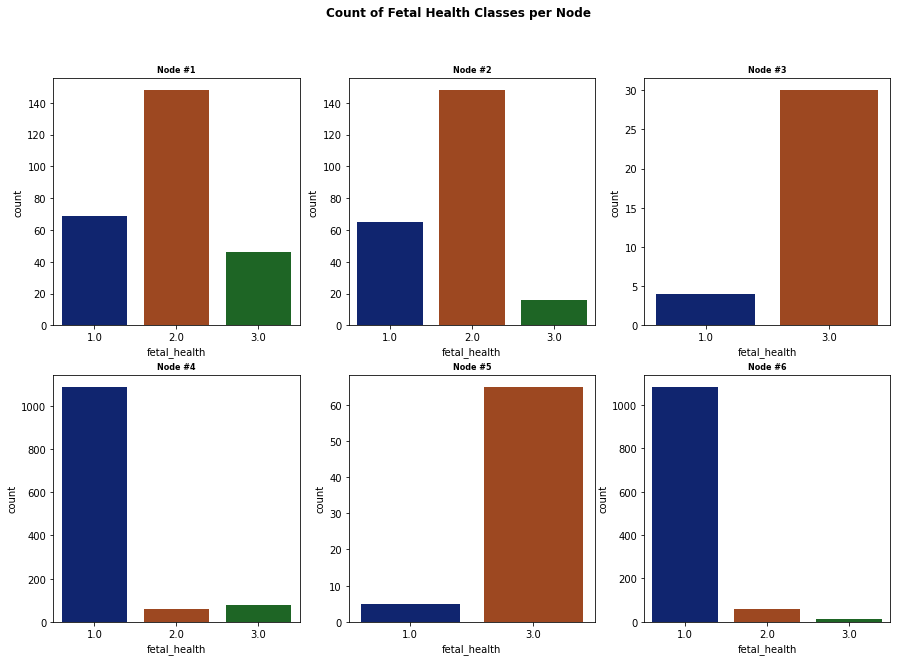

In [38]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
fig.suptitle('Count of Fetal Health Classes per Node', fontweight = 'bold')

#nós 
node_1 = train_set[train_set['mean_value_of_short_term_variability'] <= 0.55]
node_2 = node_1[node_1['percentage_of_time_with_abnormal_long_term_variability'] <= 68.5]
node_3 = node_1[node_1['percentage_of_time_with_abnormal_long_term_variability'] > 68.5]
node_4 = train_set[train_set['mean_value_of_short_term_variability'] > 0.55]
node_5 = node_4[node_4['histogram_mean'] <= 107.5]
node_6 = node_4[node_4['histogram_mean'] > 107.5]

#gráficos
sns.countplot(ax = axes[0,0], x = 'fetal_health',  data = node_1, palette = 'dark')
axes[0,0].set_title("Node #1", fontweight = "bold", fontsize = 8)

sns.countplot(ax = axes[0,1], x = 'fetal_health', data = node_2, palette = 'dark')
axes[0,1].set_title("Node #2",  fontweight = "bold", fontsize = 8)

sns.countplot(ax = axes[0,2], x = 'fetal_health', data = node_3, palette = 'dark')
axes[0,2].set_title("Node #3", fontweight = "bold", fontsize = 8)

sns.countplot(ax = axes[1,0], x = 'fetal_health', data = node_4, palette = 'dark')
axes[1,0].set_title("Node #4", fontweight = "bold", fontsize = 8)

sns.countplot(ax = axes[1,1], x = 'fetal_health', data = node_5, palette = 'dark')
axes[1,1].set_title("Node #5", fontweight = "bold", fontsize = 8)

sns.countplot(ax = axes[1,2], x = 'fetal_health', data = node_6, palette = 'dark')
axes[1,2].set_title("Node #6", fontweight = "bold", fontsize = 8)

plt.show()

Vemos, então, que o algoritmo do modelo de árvore classifica conforme a classe mais frequente em cada nó.

#### Dtreeviz visualization

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


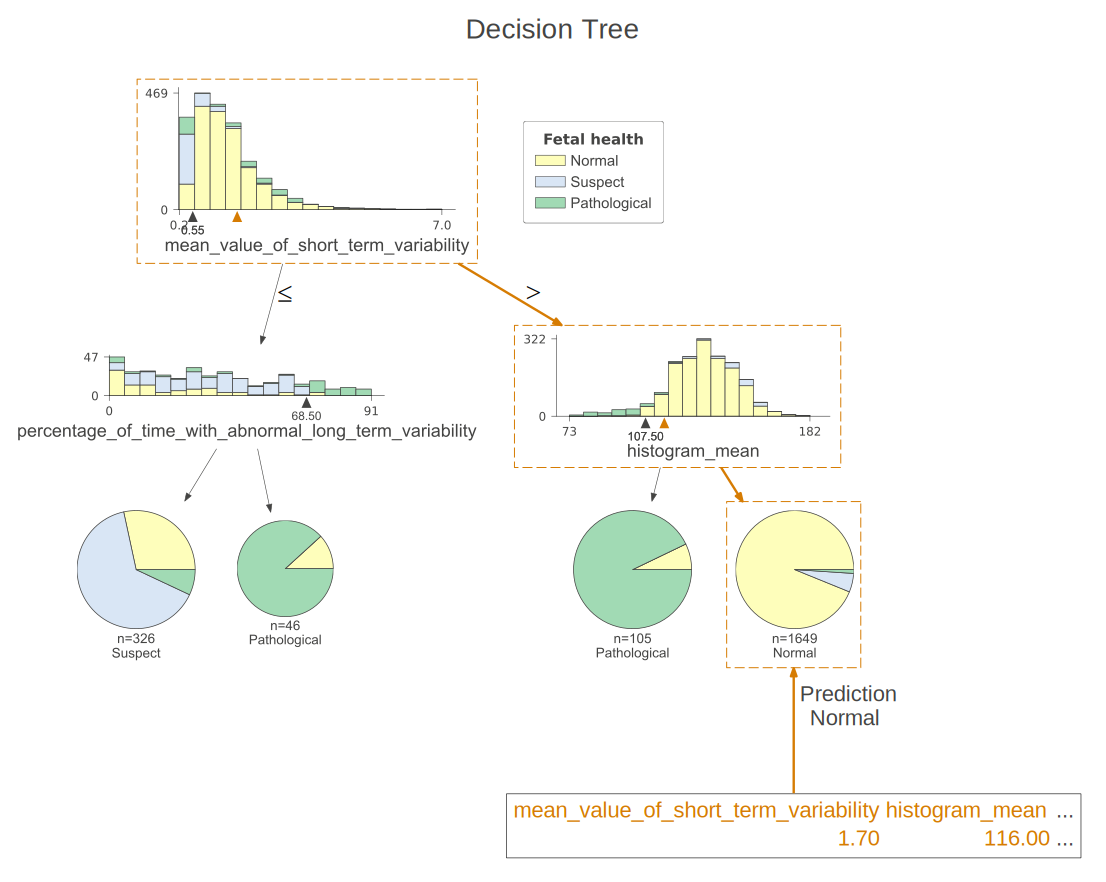

In [ ]:
#rótulo de cada feature 
feature_names = np.array(list(X.columns))

#plota gráfico 
viz = dtreeviz(clf, X.values, np.array(y.fetal_health), target_name= 'Fetal health', feature_names= feature_names, 
class_names = ['Normal', 'Suspect', 'Pathological'], title="Decision Tree", scale = 2, X = np.array(X_test)[0])    

#visualiza gráfico        
viz 

#### Real tree visualization

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 6: invalid continuation byte

<Figure size 720x720 with 0 Axes>

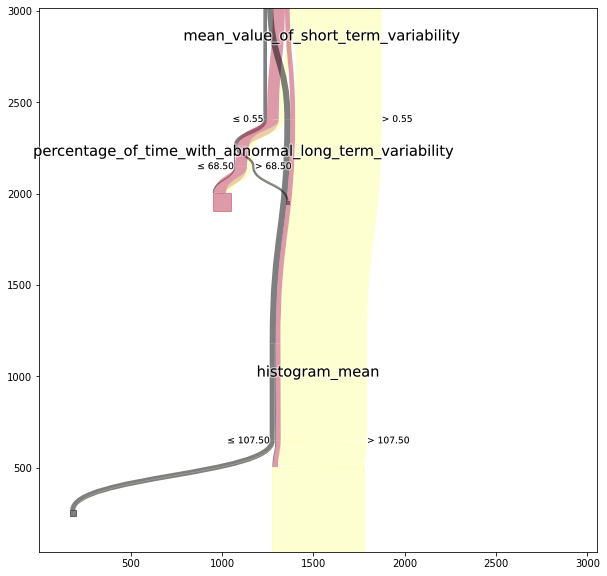

In [ ]:
#rótullo de cada feature 
features = np.array(list(X.columns))

#plota o gráfico
ax = pybaobabdt.drawTree(clf, size=10, dpi=72, features=features, colormap='inferno')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 6: invalid continuation byte

<Figure size 1440x1440 with 0 Axes>

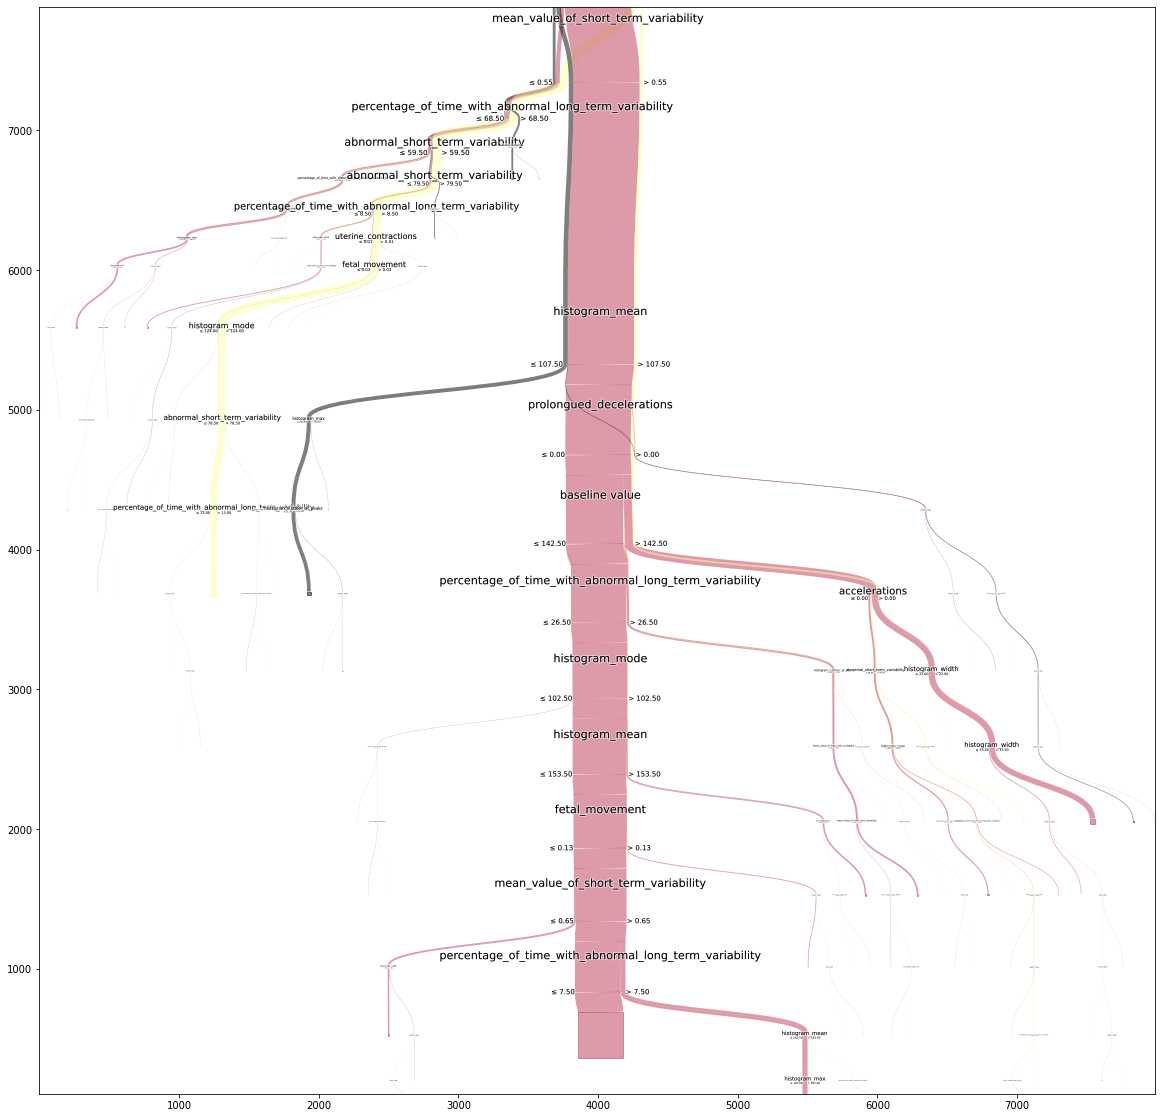

In [ ]:
#rótulo de cada feature
features = np.array(list(X.columns))

#treina novo modelo, para melhor visualização
clf = DecisionTreeClassifier().fit(X_train, y_train)

#plota o gráfico
ax = pybaobabdt.drawTree(clf, size=20, dpi=72, features=features, colormap='inferno')

# #2 BankNote Authentication Dataset

## Preprocessing

In [ ]:
#importa novo dataset 
dfb = pd.read_csv('BankNote_Authentication.csv')
print(dfb.info()) #informações básicas do dataframe
print(dfb.describe()) #medidas estatísticas do dataframe
print(dfb.head()) #primeiras 5 linhas do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.0000

In [ ]:
#valores únicos da nossa target
dfb['class'].unique()

array([0, 1], dtype=int64)

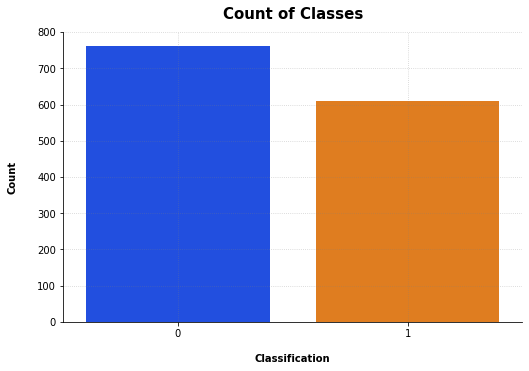

In [ ]:
#plota um gráfico de distribuição da nossa target
sns.catplot(x = 'class', kind = 'count', data = dfb, height=5.27, aspect=11.7/8.27, palette = 'bright')
plt.xlabel("Classification", labelpad=15, fontweight = "bold", size = 10)
plt.ylabel("Count", labelpad=20, fontweight = "bold", size = 10)
plt.title("Count of Classes", y=1.025, fontweight = "bold", loc = 'center', size = 15)
plt.grid(linestyle = ':', color = 'gray', alpha = 0.4, zorder = 1)
plt.tight_layout()
plt.show()

## Train and test

In [ ]:
X = (dfb[['variance', 'skewness']]) #peguemos apenas duas colunas para poder ver a região de decisão

#class
y = (dfb['class'])

In [ ]:
#divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#classificador
clf = DecisionTreeClassifier()

In [ ]:
#fita o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#profundidade do modelo de árvore
clf.tree_.max_depth

14

In [ ]:
#predições
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

## Evaluation

Acurácia no treino: 1.0
Acurácia no teste: 0.95
Confusion matrix: 
[[186   7]
 [ 11 139]]


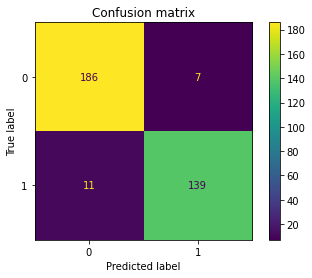

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       193
           1       0.95      0.93      0.94       150

    accuracy                           0.95       343
   macro avg       0.95      0.95      0.95       343
weighted avg       0.95      0.95      0.95       343



In [ ]:
#avalia o modelo
evaluate_model(y_train, y_test, y_train_predict, y_test_predict)

## Model interpretability and explainability

### Model visualization

#### Roc Curve

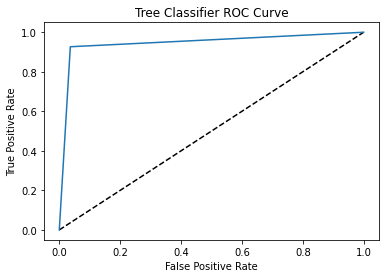

In [ ]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tree Classifier ROC Curve')
plt.show()

In [ ]:
#area under the curve
print(f'area under the roc curve: {roc_auc_score(y_test, y_pred_prob).round(2)}')

area under the roc curve: 0.95


O gráfico acima nos indica o desempenho do nosso modelo conforme a variação entre a taxa de Falso Positivo e Verdadeiro Positivo.

Quanto mais próxima do canto superior esquerdo for a curva em azul, melhor é o modelo.
Quanto maior a área sob a curva, melhor é o modelo.

Podemos ver então que nosso segundo modelo de árvore é apresenta um desempenho ótimo, visto que apresenta uma curva ROC bem próxima de 1 e uma área sob ela na mesma medida (quase 100%).

#### Decision Regions

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


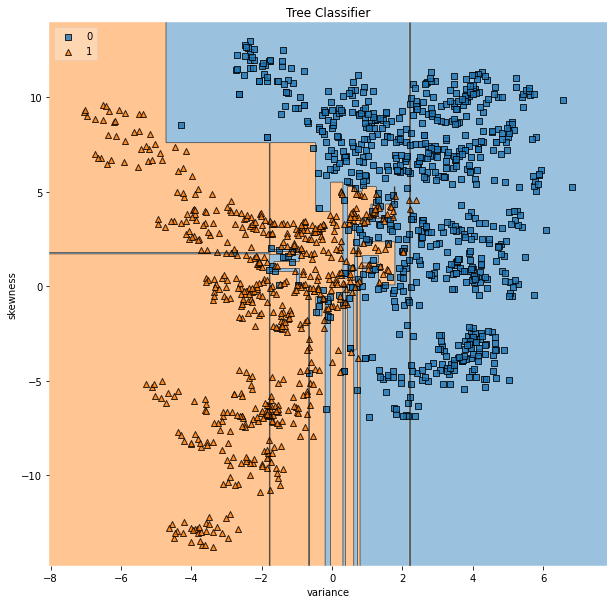

In [ ]:
#plota as regiões de decisão do modelo
plot_decision_regions(X.values, y.values, clf=clf, legend=2)
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('Tree Classifier')
plt.savefig('Decision Regions - 2nd model')
plt.show()

Aqui, conseguimos ver, mais uma vez, que o modelo apresenta a performance desejada. São poucas as classes que estão fora da sua respectiva decisão de região.

#### Classic Tree Visualization

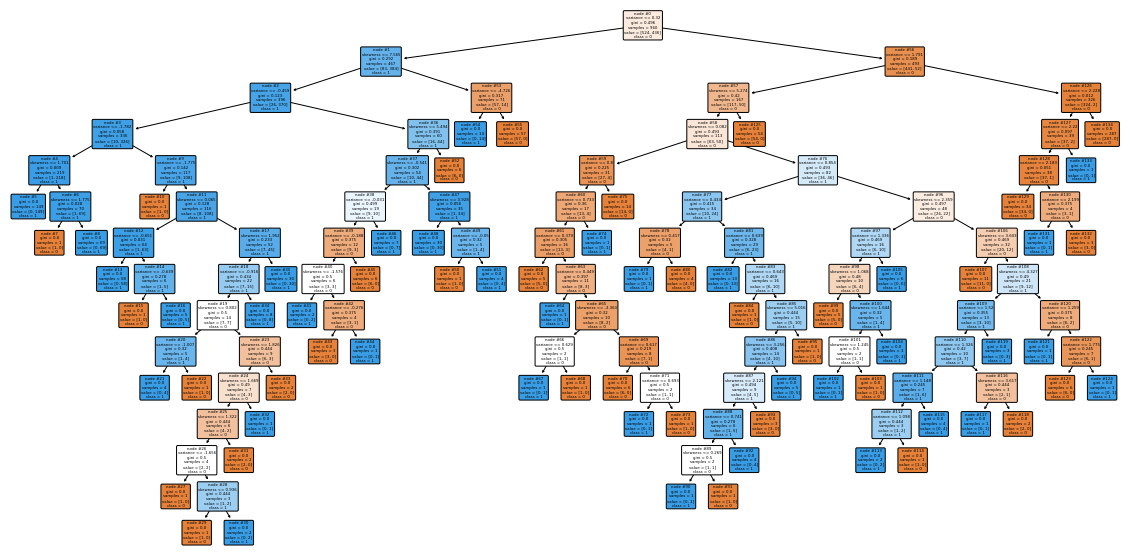

In [ ]:
#rótulo das features
feature_names = X.columns

#nome de cada classe da target
class_names = []
for Class in clf.classes_:
    string_class = str(Class)
    class_names.append(string_class)

#plota o gráfico
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names= class_names,filled = True, node_ids = True, rounded = True)
plt.savefig('Classic Tree Visualization')
plt.show()

#### Dtreeviz Visualization

In [ ]:
#rótulo de cada feature
feature_names = np.array(list(X.columns))

#plota o gráfico
viz = dtreeviz(clf, X.values, y, target_name= 'Authentication', feature_names= feature_names,
 title="Decision Tree", scale = 2, X = np.array(X_test)[0], class_names = ['authentic', 'forgery'])              
viz

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


#### Real Tree Visualization

<Figure size 720x720 with 0 Axes>

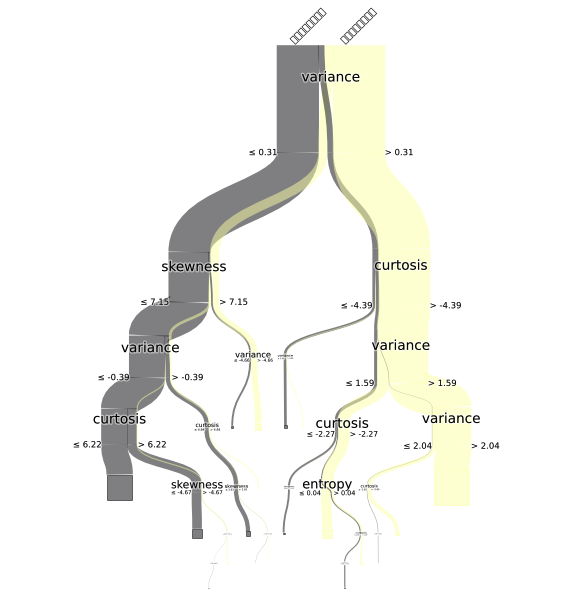

In [ ]:
#rótulo de cada feature
features = np.array(list(X.columns))

#plota o gráfico
ax = pybaobabdt.drawTree(clf, size=10, dpi=72, features=features, colormap='inferno')

### Feature Importance

In [ ]:
#treina um novo modelo, considerando todas as 4 featues
X = dfb.drop(columns = 'class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

#explicador shap
explainer = shap.TreeExplainer(clf)

#shap values
shap_values = explainer.shap_values(X)

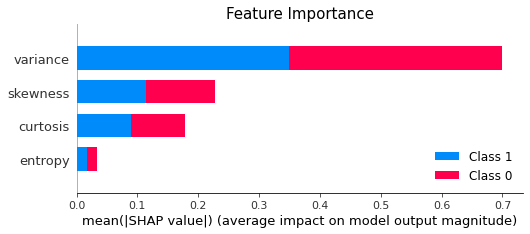

In [ ]:
#plota a importância das features com shap

shap.summary_plot(shap_values,X,show=False)
plt.title('Feature Importance',fontsize = 15) 
plt.show()

Conseguimos, por fim, perceber que, de fato, as features 'variance' e 'skewness' são as mais importantes para classificar nossa target em um modelo de árvore. 
Que sorte ter escolhido logo elas antes anteriormente, né, rs?